In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df_football = pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
dtale.show(df_football)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
dtale.show(open_browser=True)

c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

2024-05-19 23:51:16,416 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,476 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,480 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,482 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,485 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,490 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-19 23:51:16,493 - WARNING  - findfont: Font family 'Heiti TC

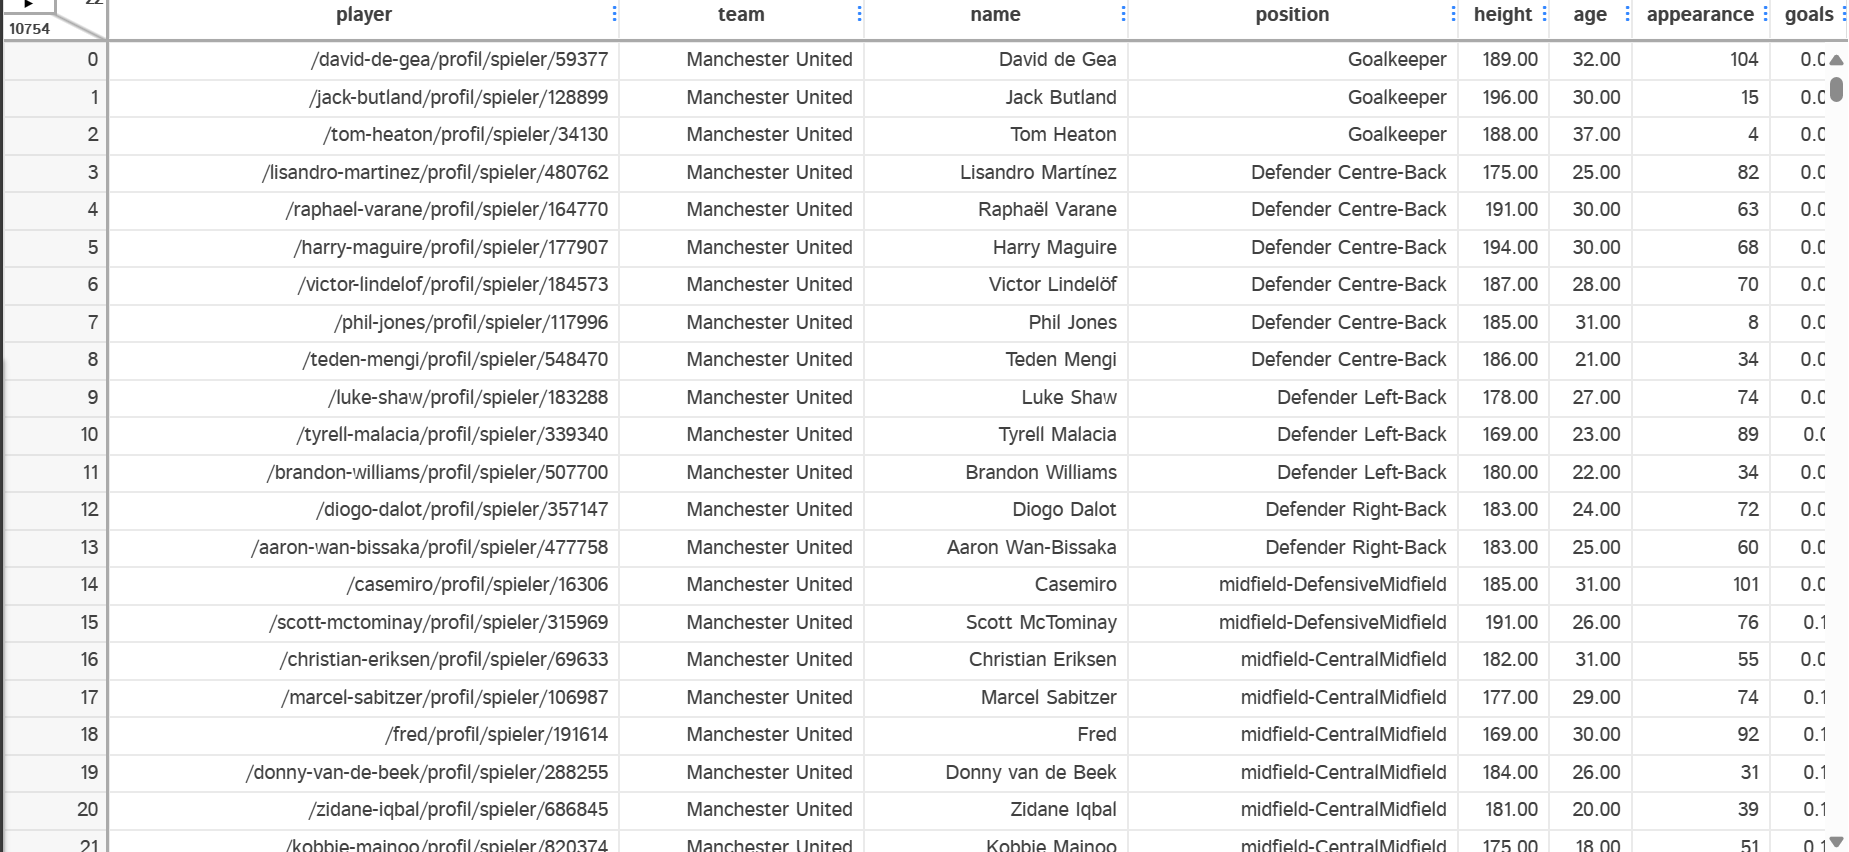

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [58]:
# it is Reliability where is Usability (10.00)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# The data is considered recent as it was collected from 2021 to 2022 and from 2022 to 2023.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [59]:
# The names of the players and the names of the teams were reviewed, making sure that they were written correctly in the same format, and the types of data were verified.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [3]:
 
df_football.drop("player", axis=1, inplace=True)
df_football.drop("team", axis=1, inplace=True)
df_football.drop("position", axis=1, inplace=True)
df_football.drop("name", axis=1, inplace=True)



#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [56]:

df_football.duplicated().sum()


0

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

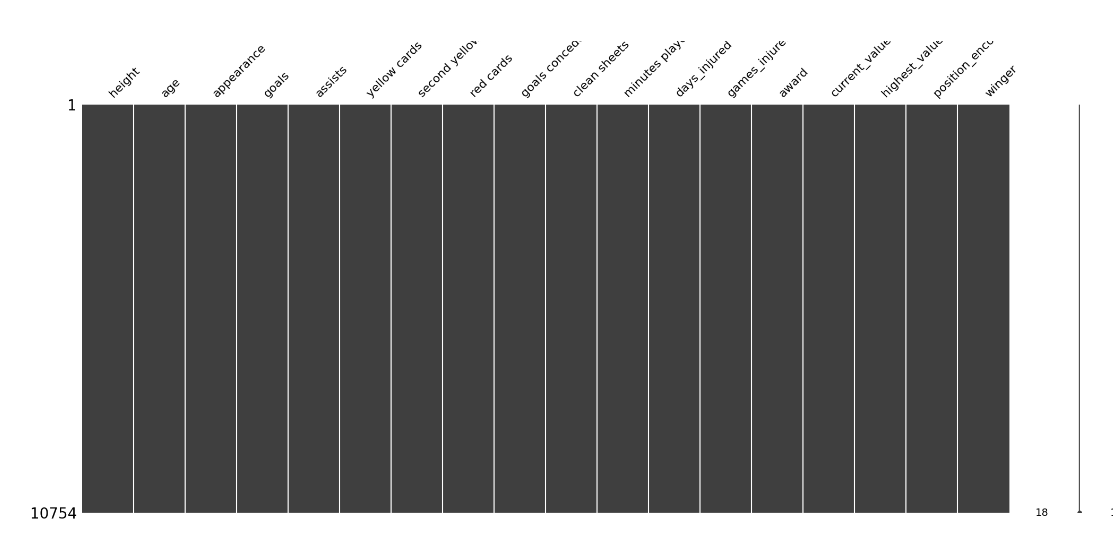

In [8]:
#Display number missing values per column
df_football.isnull().sum()

height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

<span style="color:blue">We initially thought there might be missing values represented by a dash mark (-). Upon investigation, we found dashes in the data, but they were part of the names, not indicators of missing values</span>


In [9]:

contains_dash = df_football.applymap(lambda x: '-' in str(x))

# Check if any value contains a dash
if contains_dash.any().any():
    print("The DataFrame contains the character '-' in its rows.")
else:
    print("The DataFrame does not contain the character '-' in its rows.")
    

The DataFrame does not contain the character '-' in its rows.


C:\Users\Raghad Alharbi\AppData\Local\Temp\ipykernel_20384\318374533.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [10]:
# check columns types 
df_football.dtypes

height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [11]:
df_football.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [59]:
# go to clean them 


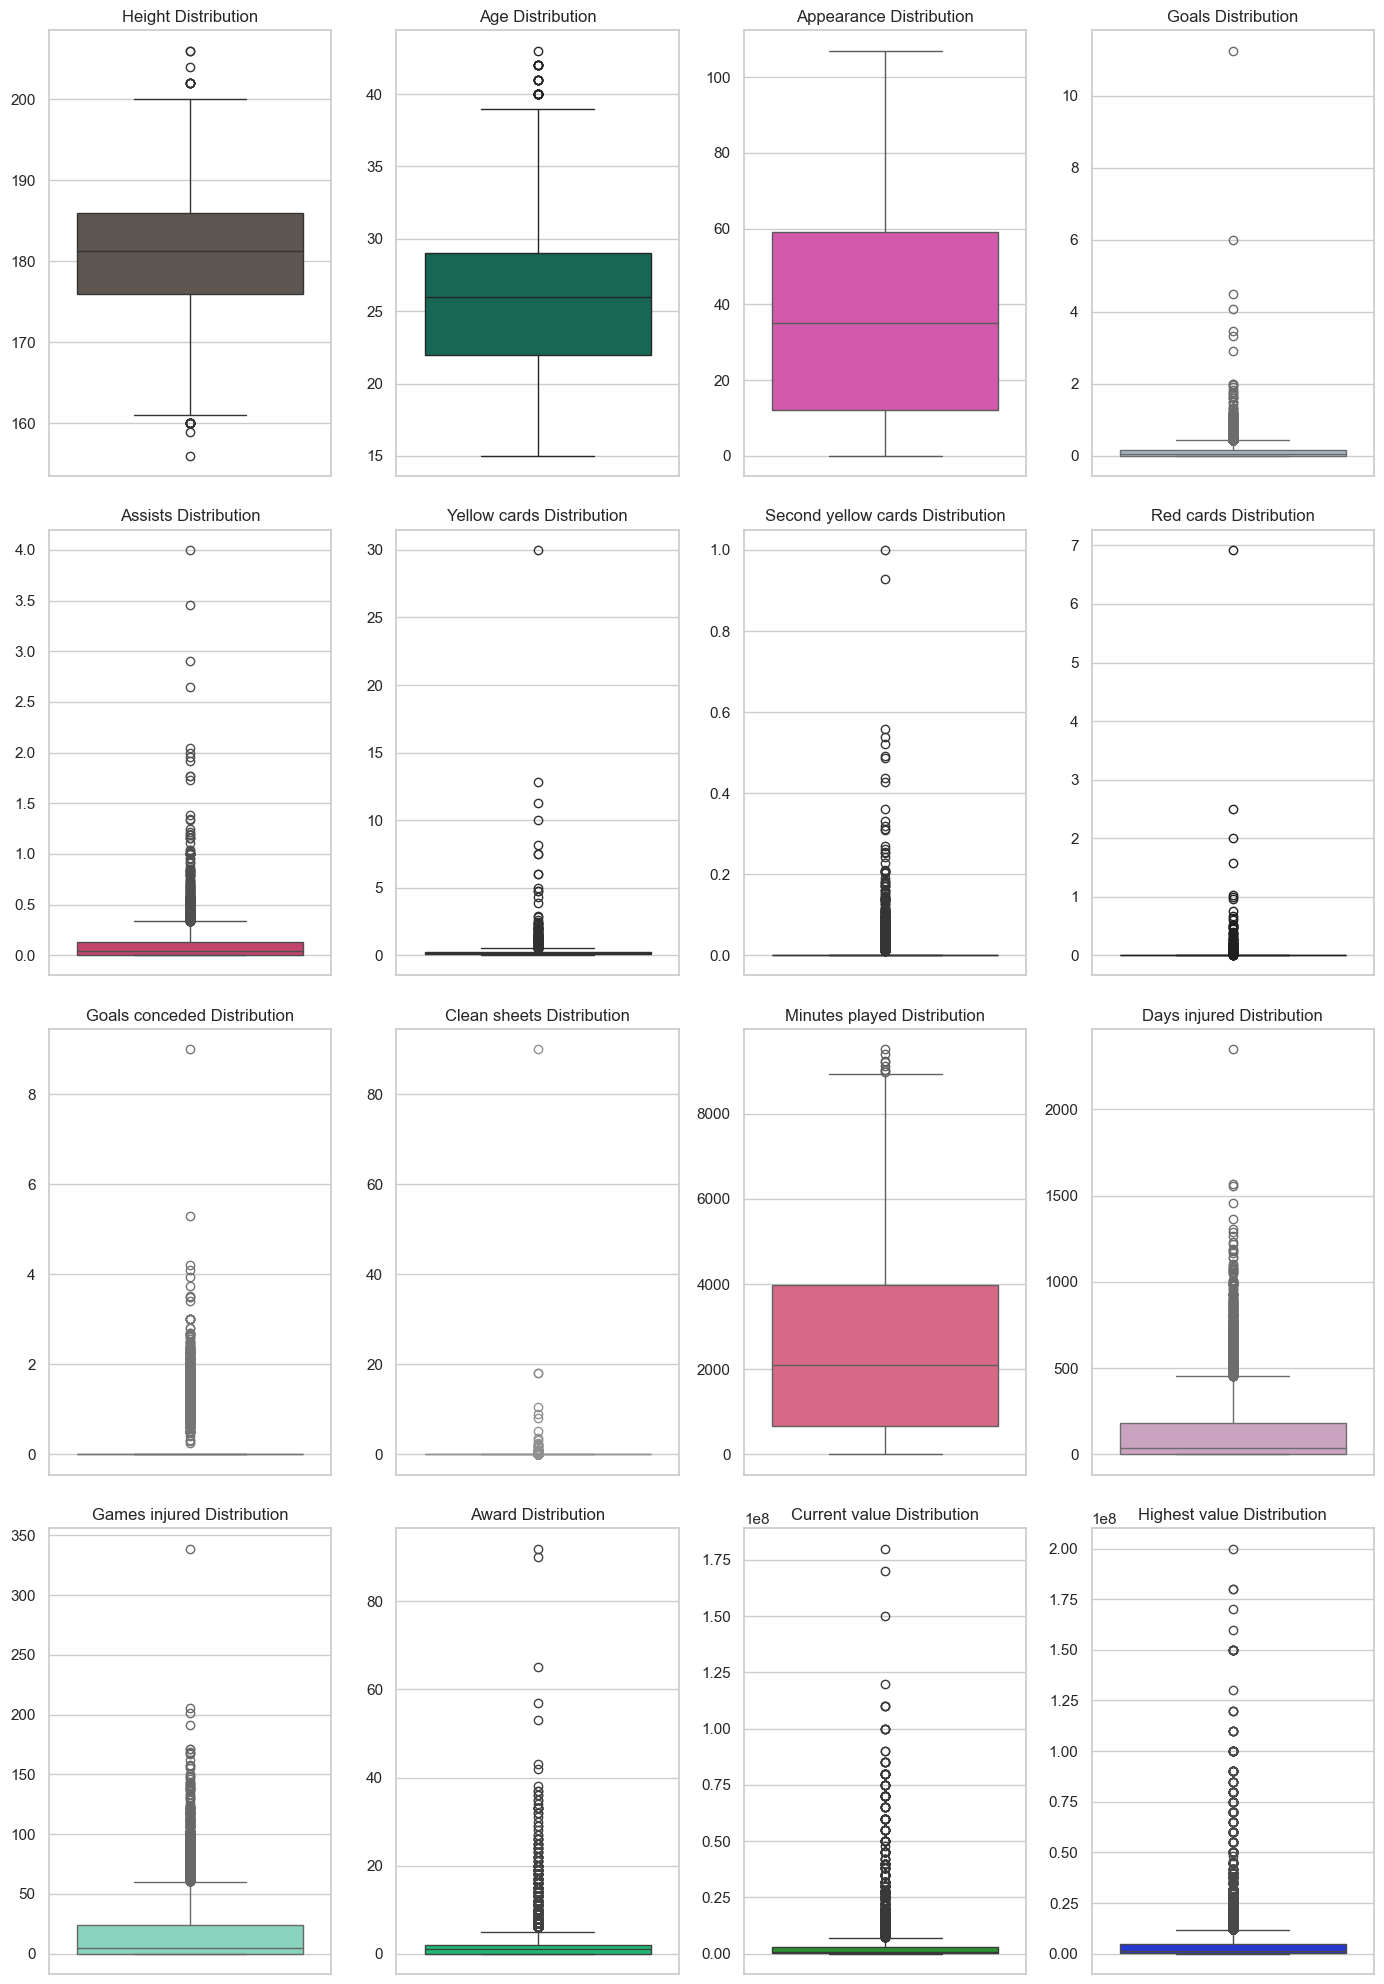

In [60]:
# check outliers 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
       
# List of columns to visualize
column_list = [ 'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards',"red cards","goals conceded","clean sheets","minutes played",
       "days_injured","games_injured","award","current_value","highest_value"]

# Ensure all selected columns are of numeric type
df_football[column_list] = df_football[column_list].apply(pd.to_numeric, errors='coerce')

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Assuming new_df is a DataFrame
data = df_football  # Use your single DataFrame directly

# Calculate the number of rows and columns needed for subplots
num_cols = len(column_list)
num_rows = (num_cols - 1) // 4 + 1  # Ceiling division to ensure all columns are accommodated

# Create a figure for the data
plt.figure(figsize=(14, 5 * num_rows))
#plt.suptitle("")

# Generate random colors for each boxplot
colors = np.random.rand(len(column_list), 3)

# Iterate over each column and create a boxplot
for idx, col in enumerate(column_list):
    # Subplot index starts from 1
    plt.subplot(num_rows, 4, idx + 1)
    
    # Replace underscores with spaces for better display
    readable_col_name = col.replace('_', ' ')

    # Create a boxplot for the current column
    sns.boxplot(y=data[col].dropna(), color=colors[idx])  # Drop NA values for plotting
    
    # Set plot title
    plt.title(f"{readable_col_name.capitalize()} Distribution")
    
    # Remove x and y labels for clarity
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
# we do not have any missing value 

In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [37]:
# all data type is good no need to change


In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
# i will deal wthe outlirs in pre prossing in model part

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
# I was delete all Categorical variabls becuse i dont not need in model 

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

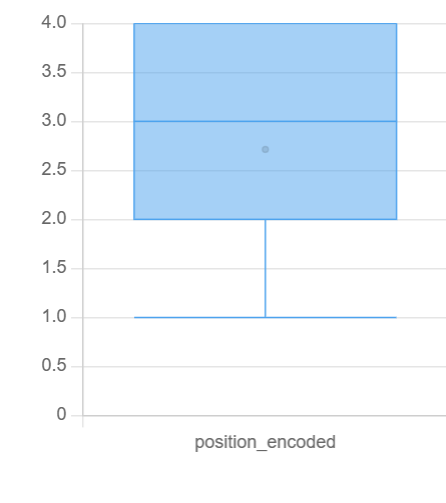

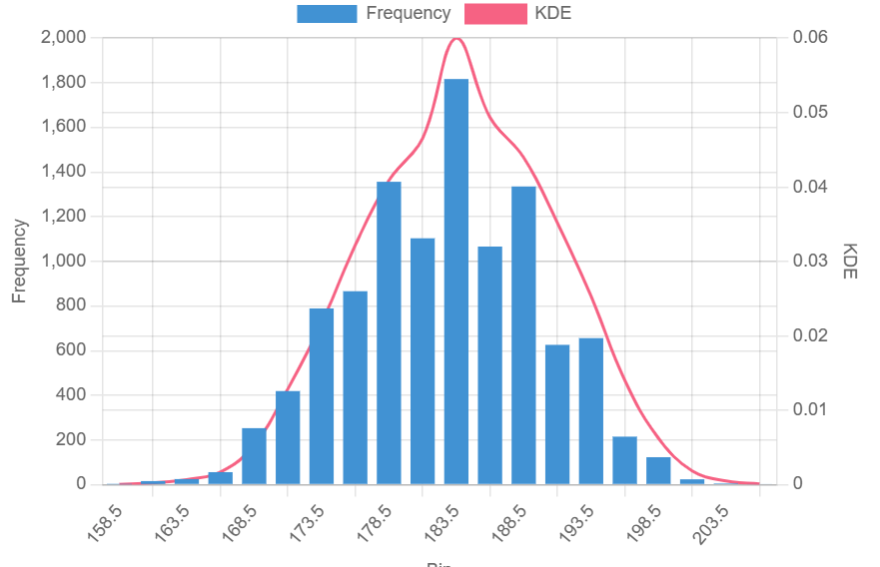

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [ ]:
# we do not have Categorical value 

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
# we do not have Categorical value 

**numerical & numerical --> (Scatter plot, line chart)**

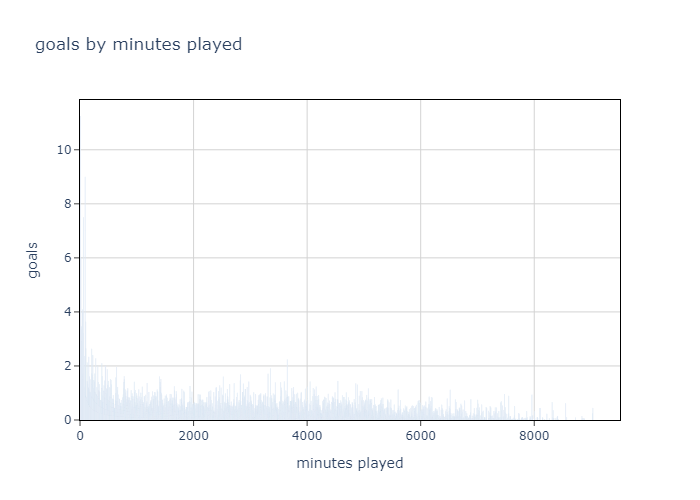

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

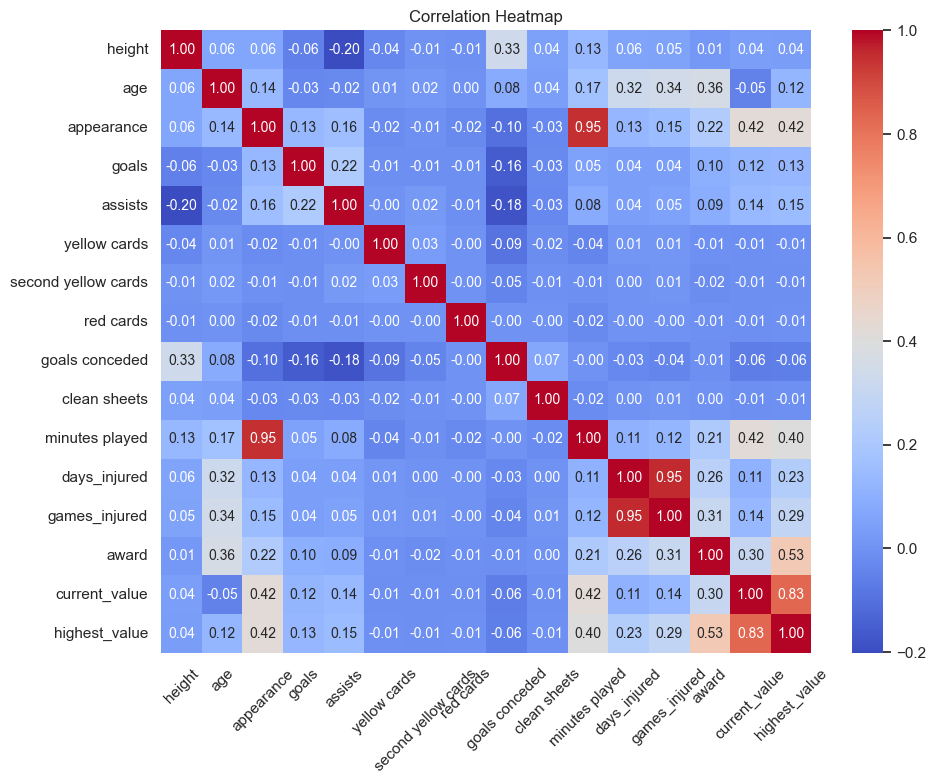

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns to ensure 'dystopia_residual' exists
selected_columns = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards',"red cards","goals conceded","clean sheets","minutes played",
       "days_injured","games_injured","award","current_value","highest_value"]

if "dystopia_residual" in df_football.columns:
    selected_columns.append("dystopia_residual")

corr = df_football[selected_columns].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap with adjusted font size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust font size here
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()


## <span style="color:red">Linear Regression Model</span>

## Import Libraries

In [12]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [13]:
# uniqeness
df_football.drop_duplicates(inplace=True)
df_football[df_football.duplicated()]

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [14]:
# Completeness
df_football.isnull().sum()

height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [15]:
# Accurecy types
df_football.dtypes

height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [16]:
# Convert categorical variables using OneHotEncoding
#categorical_features = ['team', 'name', 'position']

numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards',
                    'second yellow cards','red cards', 'goals conceded','clean sheets',
                    'naminutes played', 'days_injured','games_injured', 'award',
                    'current_value',"highest_value","position_encoded"
                    "winger"]

2024-05-20 00:08:37,046 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,052 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,056 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,059 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,063 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,065 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,070 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,075 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,078 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,083 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,089 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,093 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:37,097 - WA

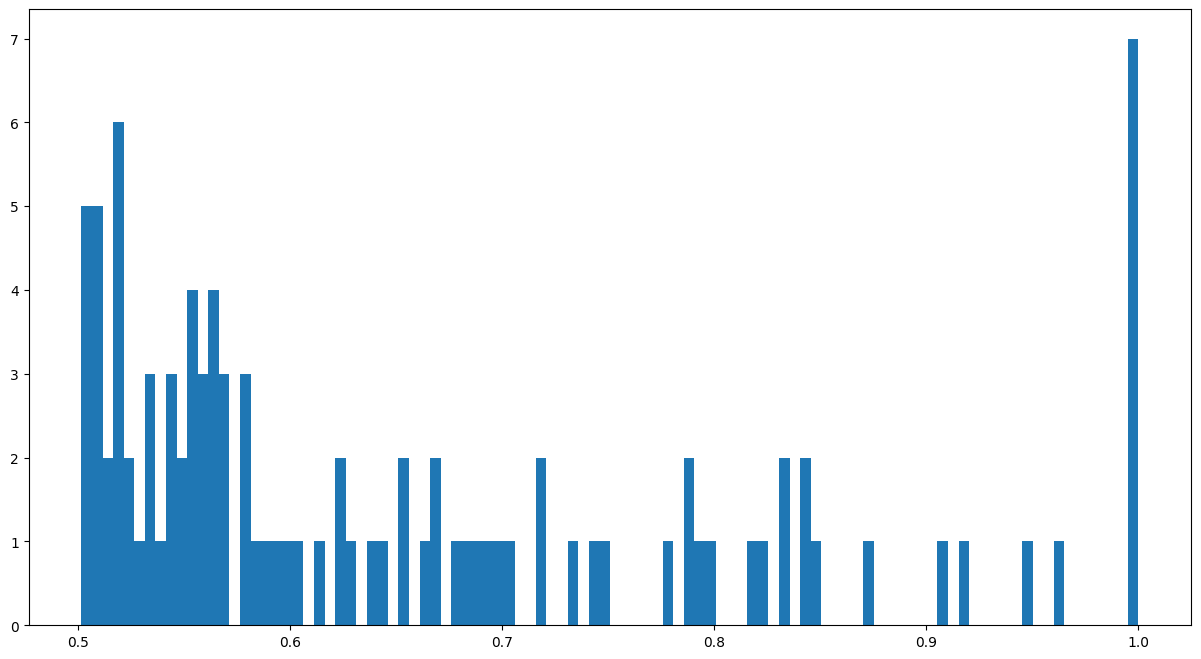

In [17]:
plt.figure(figsize=(15,8))
#plt.boxplot(df_football['assists']);
plt.hist(df_football[(df_football['assists']<=1) & (df_football['assists']>0.5)]['assists'],bins=100);


2024-05-20 00:08:44,858 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,860 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,862 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,865 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,865 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,867 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,869 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,872 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,872 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,875 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,878 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,881 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:44,883 - WA

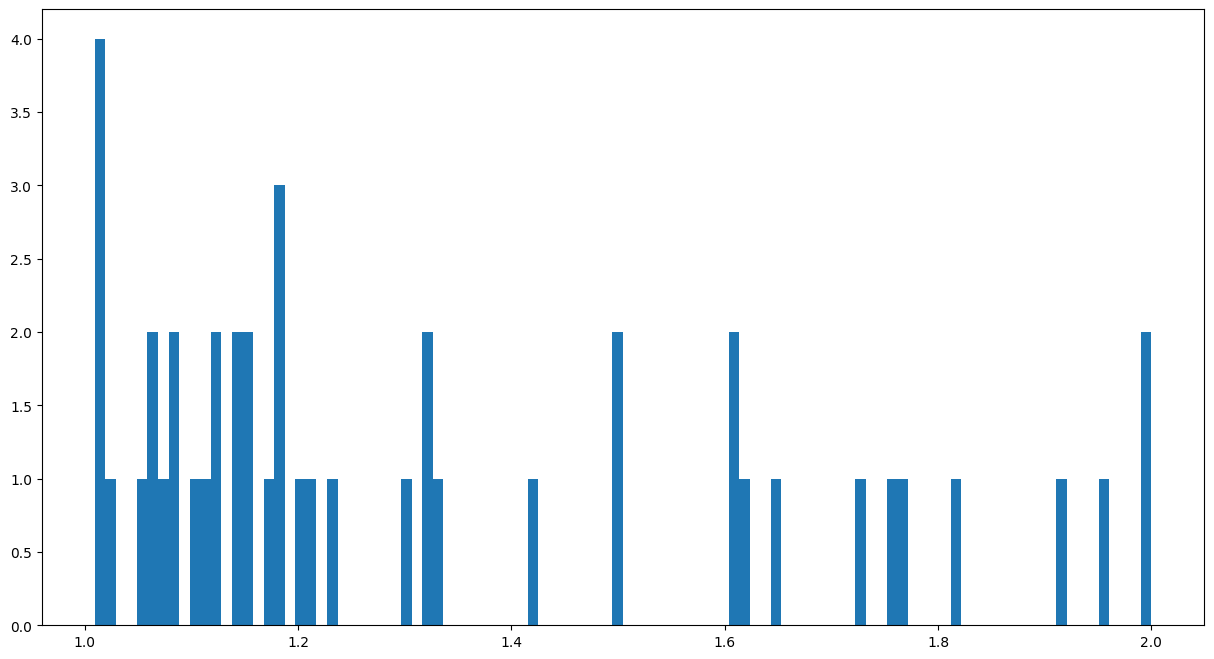

In [18]:
plt.figure(figsize=(15,8))
#plt.boxplot(df_football['goals'])
plt.hist(df_football[(df_football['goals']<=2) & (df_football['goals']>1)]['goals'], bins=100);

{'whiskers': [<matplotlib.lines.Line2D at 0x18c643e1c10>,
 'caps': [<matplotlib.lines.Line2D at 0x18c5db876d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c643e1410>],
 'medians': [<matplotlib.lines.Line2D at 0x18c643e3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c643f0590>],
 'means': []}

2024-05-20 00:08:51,442 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,447 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,449 - WARNING  - findfont: Font family 'Heiti TC' not found.


2024-05-20 00:08:51,484 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,488 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,489 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,489 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,495 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,497 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,500 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,501 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,501 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,501 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,508 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,510 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:51,513 - WA

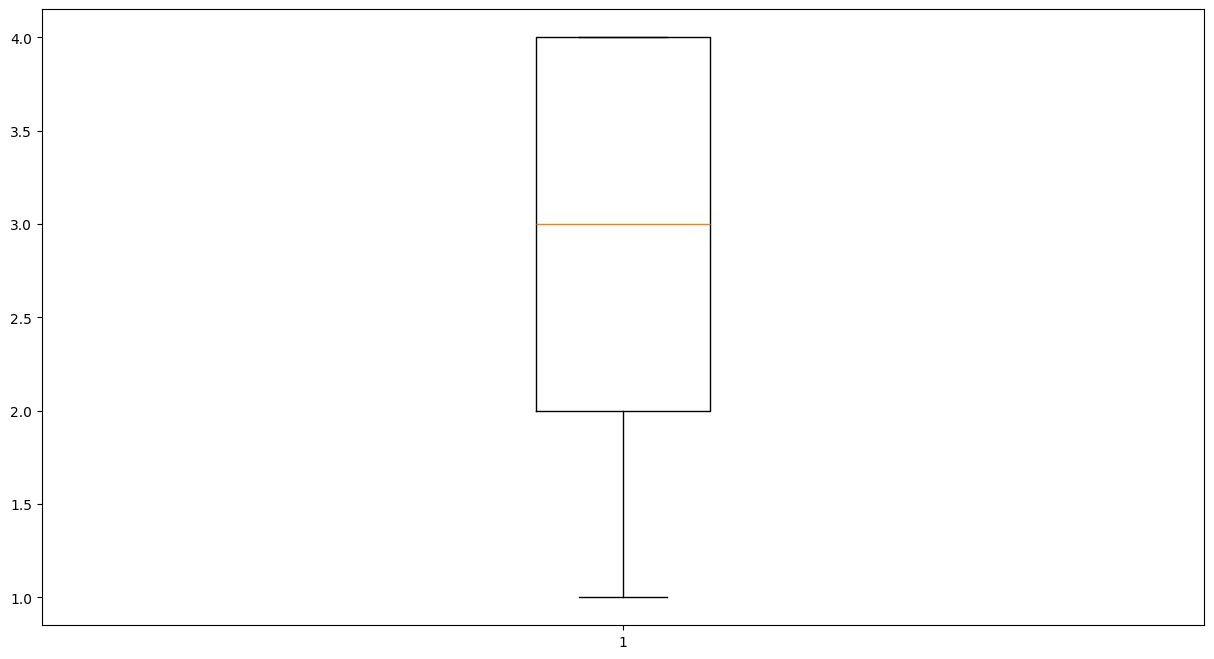

In [19]:
plt.figure(figsize=(15,8))
plt.boxplot(df_football['position_encoded'])
#plt.hist(df_football[(df_football['position_encoded']<=1.00)& (df_football['position_encoded']>0.20)]['position_encoded'], bins=100);

2024-05-20 00:08:56,368 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,370 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,372 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,373 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,375 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,376 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,379 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,380 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,382 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,382 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,385 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,397 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:56,397 - WA

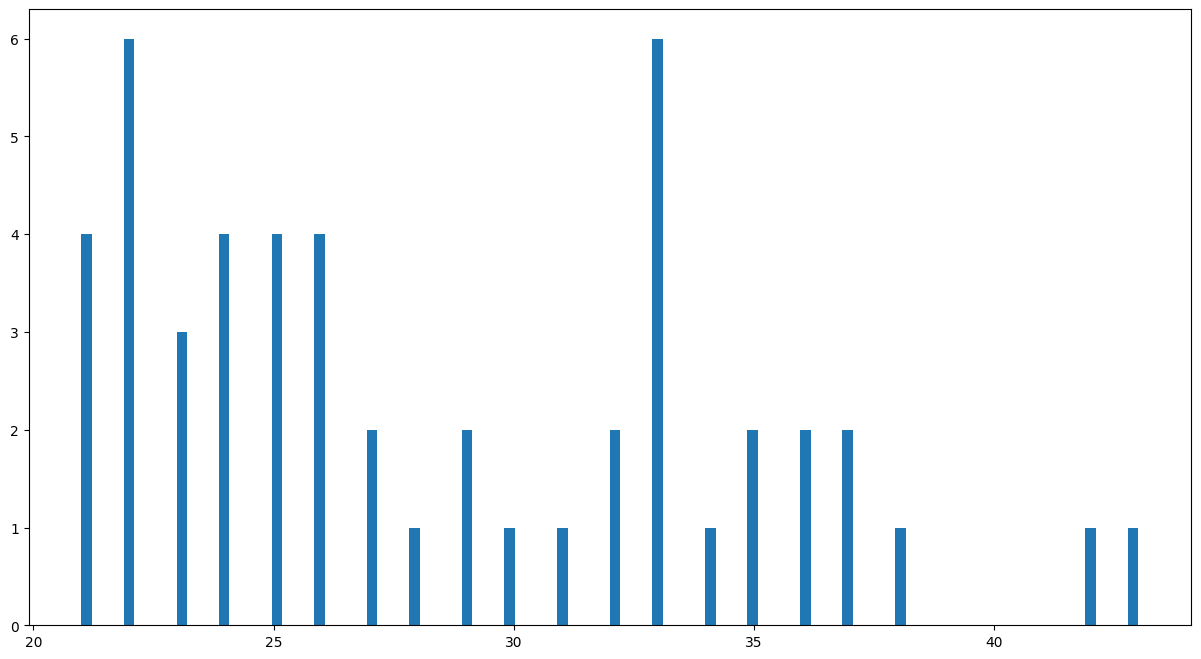

In [20]:
plt.figure(figsize=(15,8))
#plt.boxplot(df_football['award'])
plt.hist(df_football[(df_football['award']<=50) & (df_football['award']>20)]['award'], bins=100);

2024-05-20 00:08:59,975 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,975 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,979 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,979 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,982 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,984 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,985 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,989 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,991 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,993 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,997 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:08:59,998 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:00,002 - WA

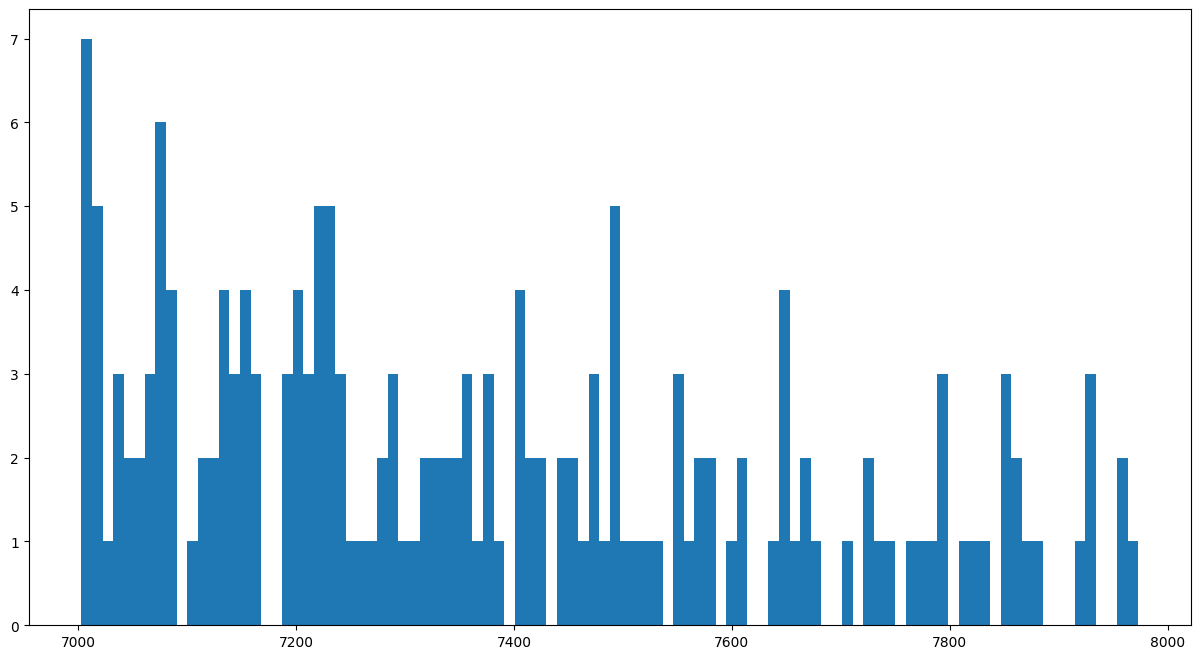

In [21]:
plt.figure(figsize=(15,8))
#plt.boxplot(df_football['minutes played'])
plt.hist(df_football[(df_football['minutes played']<=8000) & (df_football['minutes played']>7000)]['minutes played'], bins=100);

2024-05-20 00:09:03,525 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,527 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,528 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,529 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,530 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,532 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,532 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,535 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,537 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,538 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,541 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,557 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:03,557 - WA

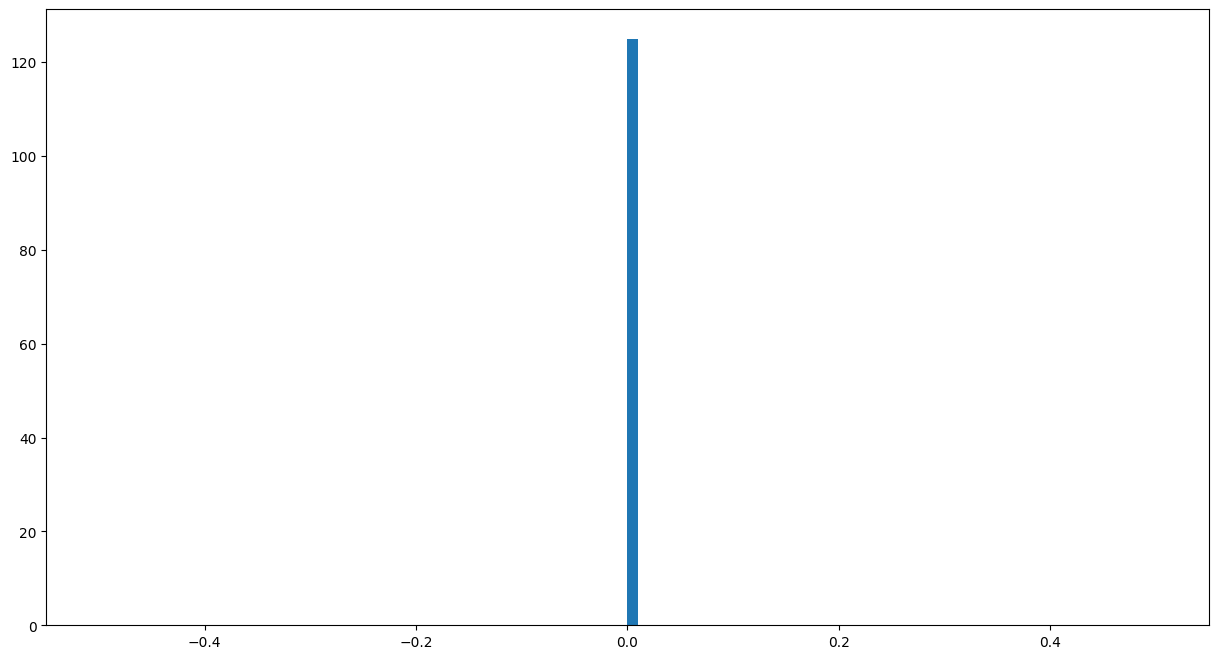

In [22]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['highest_value'])
plt.hist(df_football[df_football['highest_value']<=0.25]['highest_value'],bins=100);

{'whiskers': [<matplotlib.lines.Line2D at 0x18c651ebb10>,
 'caps': [<matplotlib.lines.Line2D at 0x18c651f4e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c651eb310>],
 'medians': [<matplotlib.lines.Line2D at 0x18c651f5c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c651f6310>],
 'means': []}

2024-05-20 00:09:06,991 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:06,992 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:06,996 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,010 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,014 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,016 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,018 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,020 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,022 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,025 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,028 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,030 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-05-20 00:09:07,032 - WA

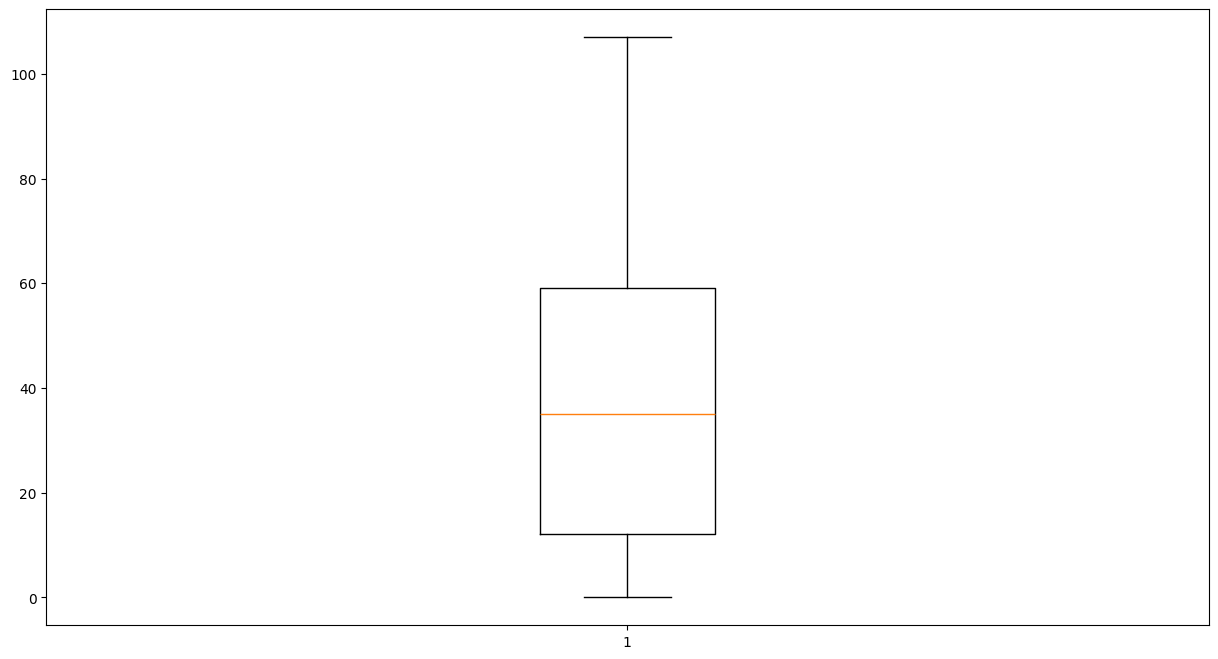

In [23]:
plt.figure(figsize=(15,8))
plt.boxplot(df_football['appearance'])

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [24]:
# Scaling
df_football.dtypes

height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [69]:
# one hot coding
#df_football = pd.get_dummies(df_football, columns=categorical_features)

#### 3. Feature selection

In [25]:
correlation = df_football.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834508
minutes played         0.420328
appearance             0.419477
award                  0.300236
assists                0.137093
games_injured          0.135297
goals                  0.121284
days_injured           0.107318
position_encoded       0.084798
height                 0.040693
winger                 0.004781
red cards             -0.010225
clean sheets          -0.011715
yellow cards          -0.012043
second yellow cards   -0.014006
age                   -0.050881
goals conceded        -0.063727
Name: current_value, dtype: float64


In [26]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value'],
      dtype='object')

In [27]:
selected_features = ['appearance', 'minutes played', 'award', 'current_value','highest_value']

In [28]:
df_football = df_football[selected_features]
df_football.head()

,appearance,minutes played,award,current_value,highest_value
0,104,9390,13,15000000,70000000
1,15,1304,1,1500000,22000000
2,4,292,4,600000,6000000
3,82,6408,9,50000000,50000000
4,63,5031,21,40000000,80000000


#### 4. Prepare train and test data

In [29]:
# Prepare data
X = df_football.drop(['current_value'], axis=1)
y = df_football['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Buliding the Model

In [30]:
model = LinearRegression()

### Train the Model

In [31]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [32]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [33]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.138026e+06
minutes played,1.978056e+06
award,-1.826189e+06
highest_value,8.189531e+06


In [34]:
print(model.intercept_)

3615763.7676097327


## Evaluating the Model

1. Mean Square Error

In [35]:
y_base = [y_train.mean()] * len(y_test)

In [36]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 90729931919628.03


In [37]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 20851296320273.613
Mean Squared Error for testing: 26714262964141.01


2. Mean Absolute Error

In [38]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4495206.5133329565


3. Root Mean Absolute Error

In [39]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2120.190206876014


In [40]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 4566321.968529334
Root Mean Squared Error for testing: 5168584.232083387


4. R Square

In [41]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7421109152530675
R Square for testing: 0.7055493825085086
